# Diferencias finitas: cálculo numérico de derivadas

En el último notebook, vimos que el método de Newton requiere utilizar la derivada de una función.
En este notebook, veremos una manera (no necesariamente la mejor) de calcular derivadas de funciones de forma numérica: las llamadas **diferencias finitas**.

## Derivadas de funciones uni-dimensionales

#### Ejercicio 1

Considera una función uni-dimensional $f: \mathbb{R} \to \mathbb{R}$, y supón que es suficientemente diferenciable para que las derivadas que tomemos estén definidas [por ejemplo, si $f$ es de clase $C^2$].

(i) Escribe, usando notación LaTeX, la definición de la derivada $f'(a)$ de $f$ en el punto $a$, como límite cuando la variable $h$ tiende a $0$.

Desgraciadamente, **no podemos llevar a cabo el proceso de límite en la computadora**: un límite es algo **continuo**, mientras que la computadora maneja cantidades **discretas**.

(ii) ¿Cuál solución se te ocurre para esto en términos de la variable $h$? 

La expresión $f(a+h) - f(a)$ se llama una **diferencia para adelante** ("forward difference"), y cuando lo dividimos por un valor fijo de $h$ se llama un **cociente de diferencias** ("difference quotient"). 

(iii) ¿Geométricamente, a qué corresponde una diferencia de este tipo? ¿Y un cociente de diferencias?

La definición es $f'(a) = \displaystyle \lim_{h\to 0} \frac{f(a+h)-f(a)}{h}$.

Como no se puede hacer un proceso continuo en la computadora, se hace que la variable $h$ sea muy chica, es decir $h\approx0$. De este modo el cociente se aproxima a la solución. 

Geométricamente, la diferencia $f(a+h)-f(a)$ es una diferencia en la altura entre los puntos $(a,f(a))$ y $(a+h,f(a+h))$, en otras palabras es una $\Delta y$. Si restamos las abscisas de los puntos observamos que, $\Delta x=(a+h)-a=h$. Entonces, podemos reescribir nuestro cociente de diferencias como $\frac{\Delta y}{\Delta x}$, lo cual es por definición la pendiente de la recta que pasa entre los puntos. 

#### Ejercicio 2

(i) Escribe una función que implemente un cociente de diferencias para una función $f$, punto $a$ y paso $h$ dadas.

(ii) Para distintas funciones $f$, grafica la función $f$, su derivada analítica $f'$, y la aproximación a $f'$ utilizando diferencias finitas con distintos pasos $h$.

(iii) Calcula el error desde el valor analítico que se comete al utilizar la aproximación de la derivada al tomar una $f$ y $a$ dadas, y al variar $h$.
Puedes utilizar la función `logspace` para que los valores de $h$ estén espaciados de forma logarítmica. Hazlo para diferentes funciones y para valores de $h$ tan chicos como $10^{-15}$. (¡Escribe una función que haga el cálculo!) ¿Qué podría causar este efecto?

(iv) ¿Para qué clase de funciones será el resultado exacto? Demuéstralo gráficamente. Así, qué tipo de **aproximación local** de la función estamos usando? 

In [1]:
#(i) Funcion paso
function paso(f,a,h)
    d=(f(a+h)-f(a))/ h
    return d
end

paso (generic function with 1 method)

In [2]:
#Prueba de mi funcion
g(x)=x^2
paso(g,2,0.000001)

4.0000010006480125

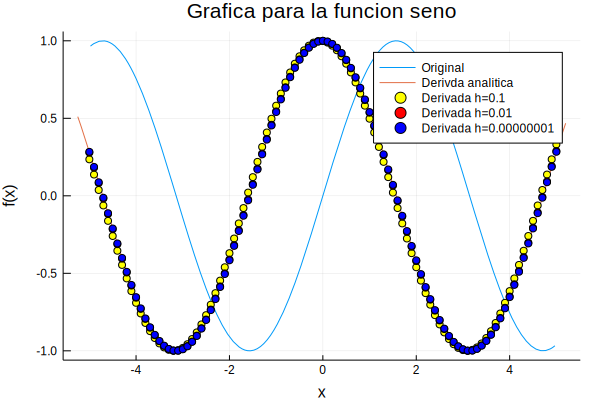

In [3]:
#(ii)graficas para distintas funciones 
#grafica para una funcion trigonometrica
using Plots 
using SymPy
x=Sym("x")
A=[]
B=[]
C=[]
D=[]
for i in -5:0.1:5
    y1=paso(sin,i,0.00000001)
    y2=paso(sin,i,0.1)
    y3=paso(sin,i,0.01)
    push!(A,y1)
    push!(C,y2)
    push!(D,y3)
    push!(B,i)
end
plot(sin(x),label="Original",title="Grafica para la funcion seno",ylabel="f(x)",xlabel="x")
plot!(cos(x),label="Derivda analitica")
scatter!(B,C,label="Derivada h=0.1",color="yellow")
scatter!(B,D,label="Derivada h=0.01",color="red")
scatter!(B,A,label="Derivada h=0.00000001",color="blue")

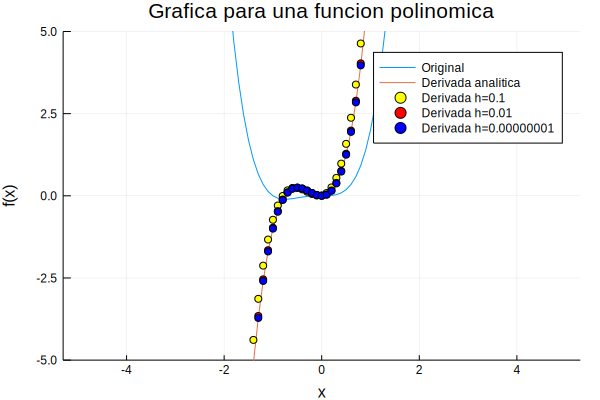

In [4]:
#(ii)graficas para distintas funciones 
#grafica para $x^4+x^3$ 
using Plots 
using SymPy
x=Sym("x")
p(x)=x^4+x^3
q(x)=4*(x^3)+3*(x^2)
A=[]
B=[]
C=[]
D=[]
AA=[]
BB=[]
for i in -5:0.1:5
    y1=paso(p,i,0.00000001)
    y2=paso(p,i,0.1)
    y3=paso(p,i,0.01)
    y4=p(i)
    y5=q(i)
    push!(A,y1)
    push!(C,y2)
    push!(D,y3)
    push!(B,i)
    push!(AA,y4)
    push!(BB,y5)
end
plot(B,AA,label="Original",title="Grafica para una funcion polinomica",ylabel="f(x)",xlabel="x",ylimits=(-5,5))
plot!(B,BB,label="Derivada analitica")
scatter!(B,C,label="Derivada h=0.1",color="yellow")
scatter!(B,D,label="Derivada h=0.01",color="red")
scatter!(B,A,label="Derivada h=0.00000001",color="blue")

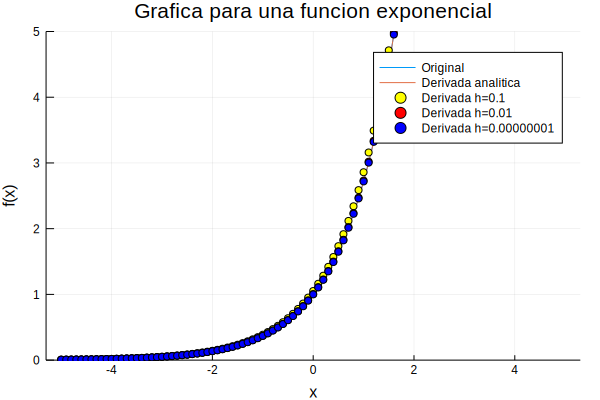

In [5]:
#(ii)graficas para distintas funciones 
#grafica para $x^4+x^3$ 
using Plots 
using SymPy
x=Sym("x")
k1(x)=exp(x)
k2(x)=exp(x)
A=[]
B=[]
C=[]
D=[]
AA=[]
BB=[]
for i in -5:0.1:5
    y1=paso(k1,i,0.00000001)
    y2=paso(k1,i,0.1)
    y3=paso(k1,i,0.01)
    y4=k1(i)
    y5=k2(i)
    push!(A,y1)
    push!(C,y2)
    push!(D,y3)
    push!(B,i)
    push!(AA,y4)
    push!(BB,y5)
end
plot(B,AA,label="Original",title="Grafica para una funcion exponencial",ylabel="f(x)",xlabel="x",ylimits=(0,5))
plot!(B,BB,label="Derivada analitica")
scatter!(B,C,label="Derivada h=0.1",color="yellow")
scatter!(B,D,label="Derivada h=0.01",color="red")
scatter!(B,A,label="Derivada h=0.00000001",color="blue")

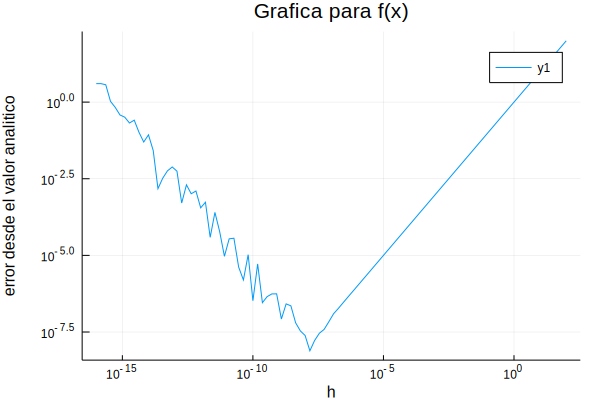

In [6]:
#(iii)
#f(x)=x^2 - 2
u1(x)=(x^2)-2
v1(x)=2*x
function errr(f,f′,a)
    BBB=[]
    T=logspace(2,-16,100)
    for i in range(1,100)
        c=paso(f,a,T[i])
        d=norm(c-f′(a))
        push!(BBB,d)
    end
    plot(T,BBB,yscale=:log10,xscale=:log10,ylabel="error desde el valor analitico",xlabel="h",title="Grafica para f(x)")
end
errr(u1,v1,2)

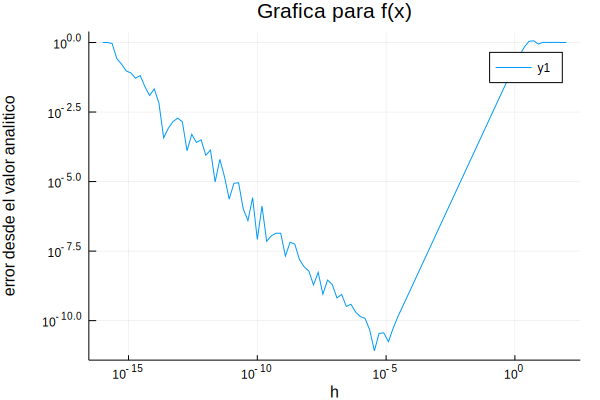

In [7]:
#(iii)
#f(x)=sin(x)
u2(x)=sin(x)
v2(x)=cos(x)
errr(u2,v2,pi)

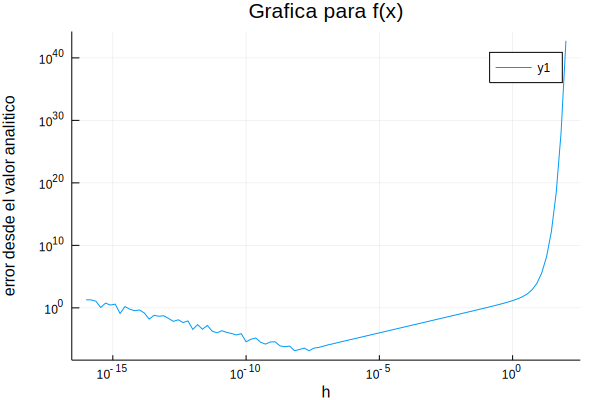

In [8]:
#(iii)
#f(x)=exp(x)-x
u3(x)=exp(x)-x
v3(x)=exp(x)-1
errr(u3,v3,3)

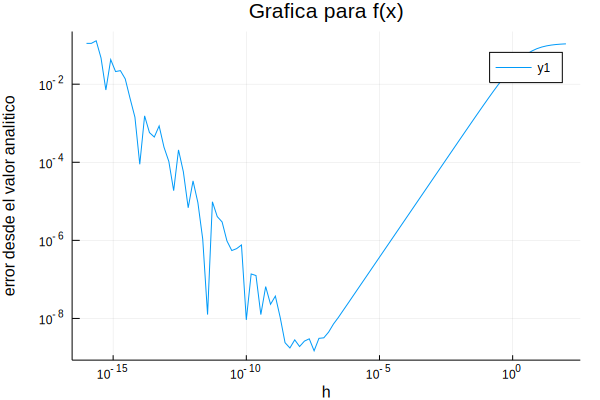

In [9]:
#(iv)
#f(x)=exp(x)-x
u4(x)=1/x
v4(x)=-(1/(x^2))
errr(u4,v4,3)

In [10]:
#(iv)

El resultado de las diferencias finitas para obtener $f'(a)$ será exacto para funciones continuamente diferenciables $C^{1}$ siempre y cuando usemos una h que minimice el error desde el valor analítico (el pico de las graficas anteriores). A continuación un ejemplo gráfico para la funcion $cos(x)$.

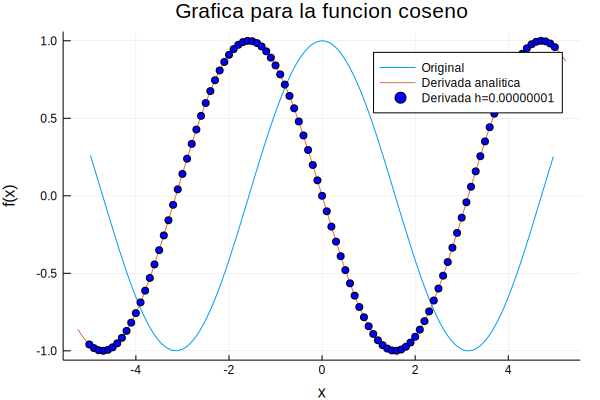

In [11]:
x=Sym("x")
AAA=[]
BBB=[]
for i in -5:0.1:5
    z=paso(cos,i,0.000000001)
    push!(AAA,z)
    push!(BBB,i)
end
plot(cos(x),label="Original",title="Grafica para la funcion coseno",ylabel="f(x)",xlabel="x")
plot!(-sin(x),label="Derivada analitica")
scatter!(BBB,AAA,label="Derivada h=0.00000001",color="blue")

In [12]:
paso(cos,pi,0.000000001) #el resultado al hacer la derivada numerica y utilizar h=1e^-7 es exacto, incluso mejor que 
#el que ofrece julia al evaluar la derivada en el punto. 

0.0

In [13]:
-sin(pi) #deberia ser cero, vemos que es muy cercano y es practicamente identico a hacer la derivada numerica.

-1.2246467991473532e-16

El tipo de aproximación local que estamos usando es la que nos da el desarrollo en serie de Taylor de la función alrededor del punto en el que estamos evaluando. 

#### Ejercicio 3 

(i) Desarrolla $f(a + h)$ en una serie de Taylor con término complementario de Lagrange. Así, rederiva la expresión aproximada que ya obtuviste para la derivada, pero ahora con información *analítica* sobre **el tamaño del error** que cometes cuando utilizas esta aproximación (asintóticamente cuando $h \to 0$). Si el error va como $C.h^n$, con $C$ una constante, entonces escribimos $\mathcal{O}(h^n)$. 

(ii) Verifica que coinicide con lo que encontraste numéricamente.

In [14]:
#(i)

Desarrollando $f(a+h)$ en una serie de Taylor tenemos que, $$f(a+h)=f(a)+hf'(a)+\dfrac{h^{2}}{2!}f''(a)+\dfrac{h^{3}}{3!}f'''(a)+ ...$$ Entonces despejando $f'(a)$, $$f'(a)=\dfrac{f(a+h)-f(a)}{h}+\dfrac{h}{2!}f''(a)+\dfrac{h^{2}}{3!}f'''(a)+ ...$$ Por lo tanto $f'(a)$ se puede escribir como, $$f'(a)=\dfrac{f(a+h)-f(a)}{h}+O(h)$$ Con $O(h)=\dfrac{h}{2!}f''(a)$.

In [111]:
#(ii)
g1(x)=sin(x)
g2(x)=cos(x)
g3(x)=-sin(x)
T=logspace(2,-16,100)
U=[]
function orror(h,u,r)
    a=(h/2)*g3(r)
    return a
end
for i in range(1,100)
    y=orror(T[i],g1,2)
    push!(U,y)
end

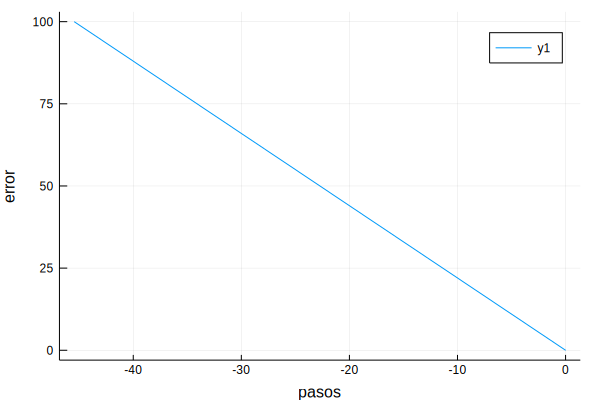

In [118]:
plot(U,T,ylabel="error",xlabel="pasos")

#### Ejercicio 4

(i) Una mejor aproximación (¿a qué nos referimos con eso?) es la **diferencia centrada**: expande $f(a+h)$ y $f(a - h)$ en series de Taylor separadas. Así, deriva una mejor aproximación a la primera derivada. Calcula su error y chécalo numéricamente.  ¿Para qué tipo de funciones es exacta? 

(ii) Encuentra una aproximación para la segunda derivada y encuentra su error; chécalo numéricamente. 

In [17]:
#(i)

Primero, expandiremos $f(a+h)$ y $f(a-h)$ en series de Taylor a segundo orden,
$$f(a+h)=f(a)+hf'(a)+\dfrac{h}{2!}f''(a)+\dfrac{h^{2}}{3!}f'''(a)$$ y $$f(a-h)=f(a)-hf'(a)+\dfrac{h}{2!}f''(a)-\dfrac{h^{2}}{3!}f'''(a).$$ Entonces, $$f(a+h)-f(a-h)=2hf'(a)+\dfrac{h^{3}((f^{3}(c_{1})+f^{3}(c_{2}))}{3!}$$ Como $f'''(a)$ es continua, podemos aplicar el teorema del valor intermedio de la siguiente manera, $$\dfrac{f^{(3)}(c_{1})+f^{(3)}(c_{2})}{2}=f^{(3)}(c).$$ Despejando $f'(a)$ encontramos nuestra aproximación para la primera derivada: $$ f'(a)=\dfrac{f(a+h)-f(a-h)}{2h}+O(h^{2})$$ con $O(h^{2})=-\dfrac{h^{3}f^{(3)}(c)}{3!}$

Una mejor aproximacion sería aquella que obtiene un error más pequeño.

In [90]:
function dcentrada(f,a,h)
    return BigFloat((f(a+h)-f(a-h))/(2*h))
end

dcentrada (generic function with 1 method)

In [107]:
function errorc(f,df,a)
    x=logspace(-15,1,60)
    dis=zeros(length(x))
    for i in 1:length(x)
        dis[i]=norm(df(a)-dcentrada(f,a,x[i]))
    end
    return dis
end

errorc (generic function with 1 method)

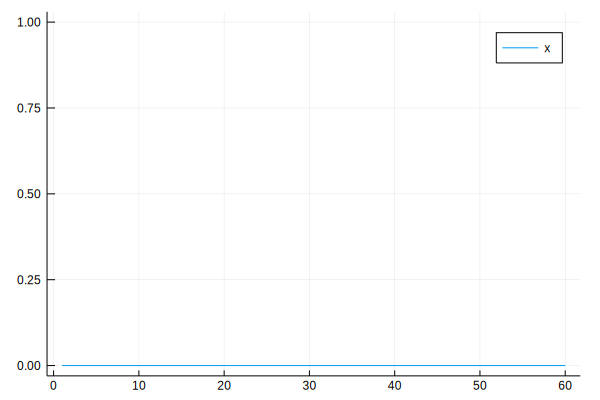

In [108]:
plot(errorc(x->x^2,x->2*x,0),label=("x")) #converge exactamente para ecuaciones de orden dos

In [18]:
#(ii)

Podríamos encontrar aproximaciones para la segunda derivada usando diferencias hacia adelante y diferencias centrales. Escribiré la aproximación para la segunda derivada usando diferencias centrales, $$ f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+O(h^4)$$ y $$
f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+O(h^4)$$ Sumando $f(x+h)$ y $f(x-h)$ y despejando $f''(x)$ obtenemos la siguiente aproximación,


$$f''(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}+O(h^2).$$ Con $O(h^{2})= \dfrac{h^{2}}{12}u^{(4)}(c).$ 

In [119]:
function dsecn(f,a,h)
    return (f(a+h)-2*f(a)+f(a-h))/(h*h)
end

dsecn (generic function with 1 method)

In [120]:
function errorsd(f,df,a)
    x=logspace(-10,-1,50)
    dis=zeros(length(x))
    for i in 1:length(x)
        dis[i]=norm(df(a)-dsecn(f,a,x[i]))
    end
    return dis
end

errorsd (generic function with 1 method)

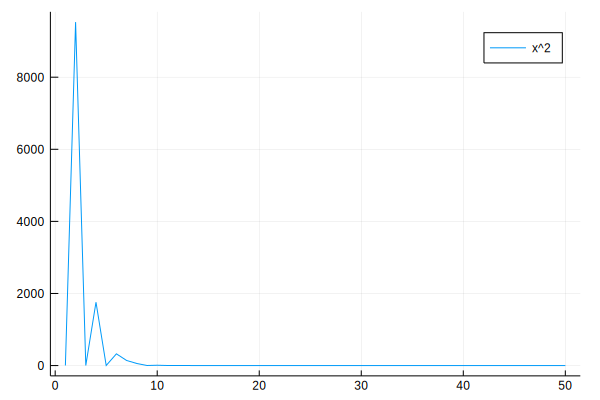

In [121]:
plot(errorsd(x->x^2,x->2*x,1),label=("x^2"))

## Funciones multi-dimensionales 

Ahora consideremos una función $f: \mathbb{R}^2 \to \mathbb{R}$ y $g: \mathbb{R}^2 \to \mathbb{R}^2$.

#### Ejercicio 5

(i) ¿Qué tipo de derivadas quisiéramos poder calcular para $f$ y $g$? ¿Cómo podemos utilizar lo que ya hicimos para funciones uni-dimensionales para aplicarlo directamente a $f$ y $g$?

(ii) Impleméntalo y compara con funciones cuyas derivadas conoces analíticamente.

In [19]:
#(i)

Para $f$ podriamos calcular las derivadas direccionales, en especial, las derivadas parciales con respecto a la n-esima variable. Podriamos escribir estas derivadas en una matriz como la siguiente: $\nabla f = (\partial_{x_1}f,\ldots,\partial_{x_n}f).$

Para $g$ podriamos calcular las derivadas parciales con respecto a la i-esima variable para la j-esima entrada. En el caso de nuestra función $g$ tendriamos la siguiente matriz, $$\mathbf{Dg}_{i,j} =
\begin{bmatrix}
  \frac{\partial g_1}{\partial x_1} & 
    \frac{\partial g_1}{\partial x_2}\\[1ex] % <-- 1ex more space between rows of matrix
  \frac{\partial g_2}{\partial x_1} & 
    \frac{\partial g_2}{\partial x_2} \\[1ex]
\end{bmatrix}.$$

In [20]:
#(ii)

In [21]:
function dif1(f,x,y,h)
    A=zeros(2)
    dx=(f(x+h,y)-f(x-h,y))/(2*h)
    dy=(f(x,y+h)-f(x,y-h))/(2*h)
    A[1]=dx
    A[2]=dy
    return A 
end

dif1 (generic function with 1 method)

In [22]:
#lo voy a probar para esta funcion
f3(a,b)=sin(a)*cos(b)

f3 (generic function with 1 method)

In [23]:
#Si me arroja los resultados que esperaba
dif1(f3,pi/4,pi/4,0.0001)

2-element Array{Float64,1}:
  0.5
 -0.5

In [24]:
#Para la funcion que va de R2 a R2. 
function dif2(g,x,y,h)
    A=zeros(2,2)
    dx1=(g(x+h,y)[1]-g(x-h,y)[1])/(2*h)
    dy1=(g(x,y+h)[1]-g(x,y-h)[1])/(2*h)
    dx2=(g(x+h,y)[2]-g(x-h,y)[2])/(2*h)
    dy2=(g(x,y+h)[2]-g(x,y-h)[2])/(2*h)
    A[1,1]=dx1
    A[2,1]=dy1
    A[1,2]=dx2
    A[2,2]=dy2
    return A
end

dif2 (generic function with 1 method)

In [25]:
#Funcion de prueba
f7(x,y)=[sin(x)*cos(y),sin(y)*cos(x)]

f7 (generic function with 1 method)

In [26]:
#si son los resultados que esperaba
dif2(f7,pi/4,pi/4,0.0001)

2×2 Array{Float64,2}:
  0.5  -0.5
 -0.5   0.5

## De regreso al método de Newton

#### Ejercicio 6

Utiliza una diferencia finita, con una $h$ pequeña, para aproximar la derivada en el método de Newton. ¿Cómo afecta el utilizar una aproximación de la derivada, en lugar del valor exacto, en la tasa de convergencia? Compara los resultados al utilizar los dos tipos de diferencias finitas (para adelante y centrada).

In [50]:
function paso(f,a,h)#diferencia hacia adelante
    d=(f(a+h)-f(a))/ h
    return d
end
function paso2(f,a,h)#diferencia centrada
    d=(f(a+h)-f(a-h))/2h
    return d
end
function newtonclasico(f,f′,x0)#metodo de newton convencional
    A=[]
    while true
        push!(A,x0)
        x1=x0-(f(x0)/f′(x0))
        x0=x1
        if f(x0)>0 && f(x0)<0.000000000000001
            break
        end
    end
    return A
end
function newtondelante(f,x0)#metodo de newton con diferencia hacia adelante
    A=[]
    while true
        push!(A,x0)
        x1=x0-(f(x0)/paso(f,x0,3))
        x0=x1
        if f(x0)>0 && f(x0)<0.000000000000001
            break
        end
    end
    return A
end
function newtoncentrado(f,x0)#metodo de newton con diferencia centrada
    A=[]
    while true
        push!(A,x0)
        x1=x0-(f(x0)/paso2(f,x0,3))
        x0=x1
        if f(x0)>0 && f(x0)<0.000000000000001
            break
        end
    end
    return A
end

newtoncentrado (generic function with 1 method)

In [63]:
fs(x)=x^2 -2
g(x)=2x
A1=newtonclasico(fs,g,100)
A2=newtondelante(fs,100)
A3=newtoncentrado(fs,100)

11-element Array{Any,1}:
 100      
  50.01   
  25.025  
  12.5525 
   6.35589
   3.33528
   1.96747
   1.492  
   1.41624
   1.41422
   1.41421

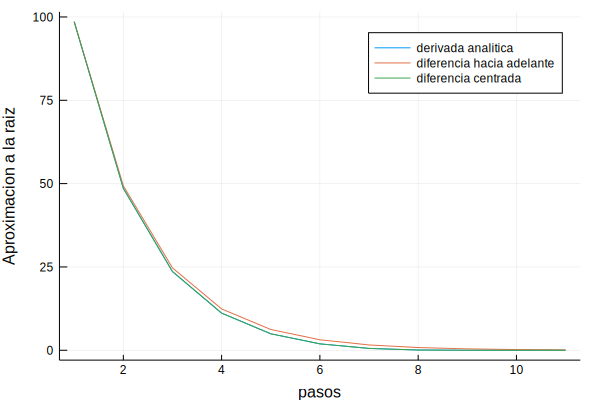

In [64]:
B1=[]
B2=[]
B3=[]
for i in range(1,length(A1))
    dn1=abs(A1[i]-sqrt(2))
    dn2=abs(A2[i]-sqrt(2))
    dn3=abs(A3[i]-sqrt(2))
    push!(B1,dn1)
    push!(B2,dn2)
    push!(B3,dn3)
end
plot(B1,label="derivada analitica",xlabel="pasos",ylabel="Aproximacion a la raiz")
plot!(B2,label="diferencia hacia adelante")
plot!(B3,label="diferencia centrada")

Observamos que el metodo de newton con la diferencia centrada es practicamente identico a implementar el metodo de Newton con la derivada analitica.

## Diferencias finitas con pasos complejos



Una alternativa interesante es el utilizar la fórmula

$$f'(a) \simeq \frac{\mathrm{Im}[f(a + ih)]}{h},$$

donde $i=\sqrt{-1}$ y utilizamos evaluaciones complejas de la función real $f$; $\mathrm{Im}$ denota la parte imaginaria.

#### Ejercicio 7

(i) Implementa esto y verifica que puedes utilizar valores de $h$ ridículamente pequeñas.

(ii) Encuentra el tamaño del error numérico en función de $h$.

(iii) Utiliza un desarrollo de Taylor para encontrar el tamaño del error.

In [33]:
#(i)
#Implementando el metodo
function dif4(f,a,h)
    f′(a)=imag(f(a+(complex(0,1)*h)))/h
    return f′(a)
end

dif4 (generic function with 1 method)

In [34]:
#funcion de prueba para verificar que funciona
f8(x)=sin(x)

f8 (generic function with 1 method)

In [35]:
#h es del orden de 10^-33, una h ridiculamente pequeña.
dif4(f8,pi/4,1e-32)

0.7071067811865476

In [67]:
#(ii)
T=logspace(0,-16,100)
RE=[]
for i in range(1,100)
    error=abs(cos(pi/4)-dif4(f8,pi/4,T[i]))
    push!(RE,error)
end

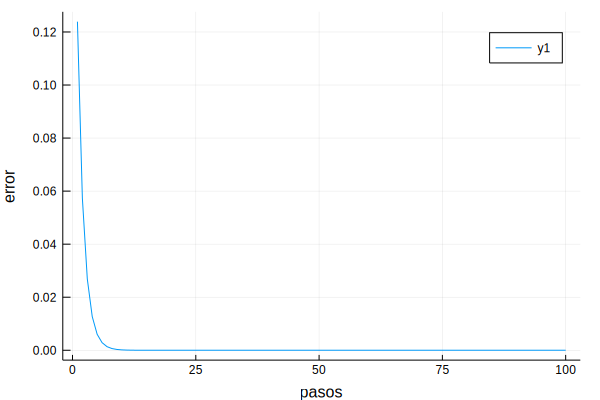

In [70]:
plot(RE,ylabel="error",xlabel="pasos")

Haciendo un desarrollo en serie de Taylor de $f(a+ih)$ tenemos que, $$f(a+ih)=f(a)+ihf'(a)-h^2\frac{f''(a)}{2!}-ih^3\frac{f'''(a)}{3!}+...$$ Si tomamos la parte imaginaria y desejamos $f'(a)$ obtenemos que, $$f'(a)=\frac{[Im(f(a+ih)]}{h}+h^2\frac{f'''(a)}{3!}+...$$ Por lo tanto el error es $O(h^{2})=h^2\dfrac{f'''(a)}{3!}.$